In [2]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import eit
import pandas as pd
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='cm')

In [3]:
def weighted_std(values, weights, axis=None):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights, axis=axis)
    variance = np.average((values-average)**2, weights=weights, axis=axis)  # Fast and numerically precise
    return np.sqrt(variance)

In [4]:
root_path = 'results/temporal_recovery_'
run_ids = ['n=4_ff23183b', 'n=5_aab75251', 'n=6_bebc881d']
compare_run_ids = ['n=4_collocation_459c460f', 'n=5_collocation_cde5b514', 'n=6_collocation_e759af6c']
ns = [4,5,6]
n_bdy = 32
n_sensor = 8

In [5]:
results = []
weights = []
for run_id in run_ids:
    path = os.path.join(root_path + run_id, 'results.pkl')
    print path
    with open(path) as f:
        result = pickle.load(f)
    results.append(result[-1])
    weights_path = os.path.join(root_path + run_id, 'detailed_summaries', 'Frame_18.csv')
    weights.append(pd.read_csv(weights_path).Weights)

results/temporal_recovery_n=4_ff23183b/results.pkl
results/temporal_recovery_n=5_aab75251/results.pkl
results/temporal_recovery_n=6_bebc881d/results.pkl


In [6]:
compare_results = []
compare_weights = []
for run_id in compare_run_ids:
    path = os.path.join(root_path + run_id, 'results.pkl')
    print path
    with open(path) as f:
        result = pickle.load(f)
    compare_results.append(result[-1])
    weights_path = os.path.join(root_path + run_id, 'detailed_summaries', 'Frame_18.csv')
    compare_weights.append(pd.read_csv(weights_path).Weights)


results/temporal_recovery_n=4_collocation_459c460f/results.pkl
results/temporal_recovery_n=5_collocation_cde5b514/results.pkl
results/temporal_recovery_n=6_collocation_e759af6c/results.pkl


In [7]:
actual_ns = [len(eit.grids.construct_circular(n, n_bdy, n_sensor).all) for n in ns]

In [8]:
stds = [np.mean(weighted_std(np.exp(r), w, axis=0)) for r, w in zip(results, weights)]
compare_stds = [np.mean(weighted_std(np.exp(r), w, axis=0)) for r,w in zip(compare_results, compare_weights)]

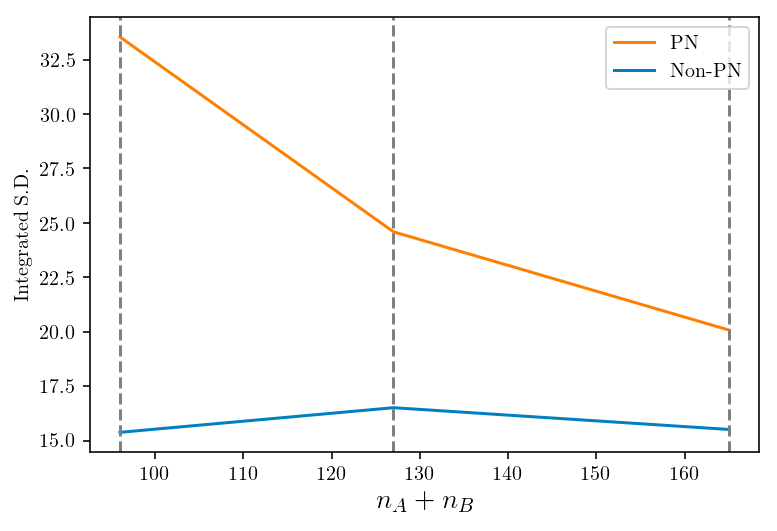

In [11]:
plt.plot(actual_ns, stds, label='PN',c=plt.cm.get_cmap('autumn')(0.5))
plt.plot(actual_ns, compare_stds, label='Non-PN', c=plt.cm.get_cmap('winter')(0.5))
plt.legend()
plt.xlabel('$n_A + n_B$', fontsize=14)
plt.ylabel('Integrated S.D.')

for n in actual_ns:
    plt.axvline(n, linestyle='--', c='gray')
plt.savefig('figures/integrated_variance_temporal.pdf')